**TASK 4  Data Collection in the Wild**

**TASK 4 QUESTION 1**

Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform?

CSV files combined successfully!


c:\Users\Chepu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.1611
Precision: 0.1070
Recall: 0.1611
Confusion Matrix:
[[4999    0    0  260  172 2068]
 [3946    0    0   95 3458    0]
 [3681    0    0   88 3577  153]
 [5096   12    0  256 1577  558]
 [5129    0    0  227 1727  416]
 [5028    0    0  105 2098  268]]


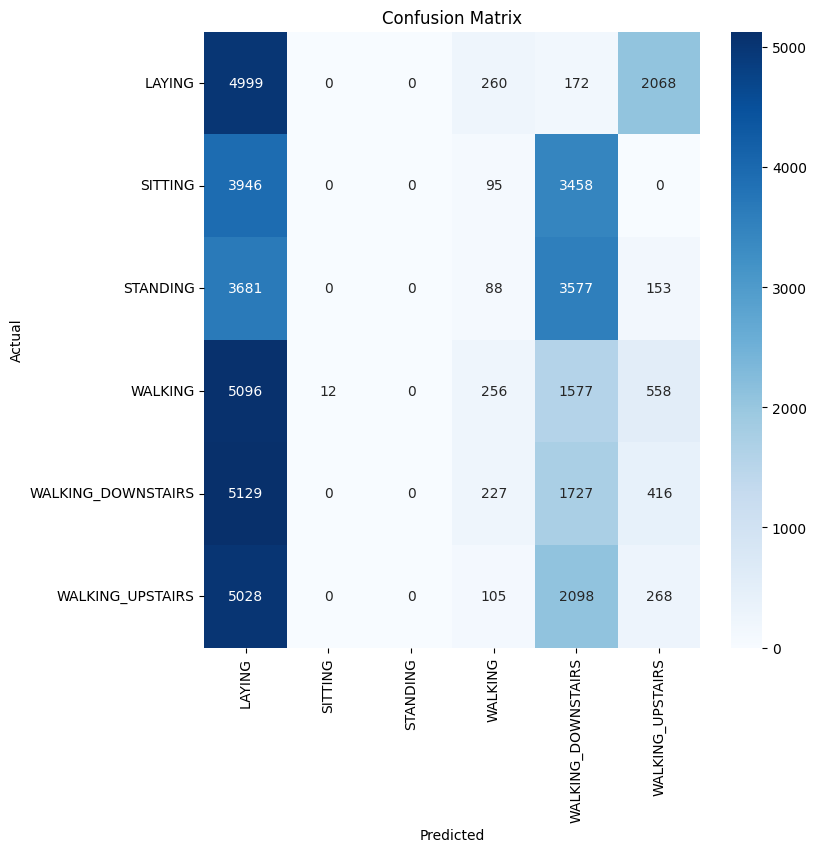

In [52]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to hold features and labels
total_features = []
y = []

# Path to the directory containing training data
com_data_dir = "C:/Users/Chepu/OneDrive/Desktop/ML Assignments/Combined/Train"

# List of activities
activities = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Iterate over activities and subjects
for activity in activities:
    # Path to the activity's directory
    activity_dir = os.path.join(com_data_dir, activity)
     
    # List all CSV files for the activity
    subject_files = [file for file in os.listdir(activity_dir)]

    for file in subject_files:
        # Load the data for each subject
        data_path = os.path.join(activity_dir, file)
        data = pd.read_csv(data_path)
        
        # Extract the accelerometer data
        acc_x = data['accx']
        acc_y = data['accy']
        acc_z = data['accz']

        # Combine into a single DataFrame
        df1 = pd.DataFrame({'accx': acc_x, 'accy': acc_y, 'accz': acc_z})
        total_features.append(df1)
        y.extend([activity] * len(df1))  # Repeat the activity label for each row

# Combine all feature DataFrames into one
combined_features = pd.concat(total_features, ignore_index=True)

# Save combined features and labels
combined_features.to_csv('training_data.csv', index=False)
y_df = pd.DataFrame(y, columns=['activity'])
y_df.to_csv("y_train.csv", index=False)

# List of directories containing the CSV files for testing
csv_directories = [
    'C:/Users/Chepu/OneDrive/Desktop/ML Assignments/Meshva data',
    'C:/Users/Chepu/OneDrive/Desktop/ML Assignments/niyati data',
    'C:/Users/Chepu/OneDrive/Desktop/ML Assignments/thrisha data'
]

# List to hold DataFrames
dataframes = []

# Iterate over each directory
for directory in csv_directories:
    # Get a list of all CSV files in the current directory
    csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

    # Read each CSV file into a DataFrame and add it to the list
    for file in csv_files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame into a new CSV file
combined_df.to_csv('combined_output.csv', index=False)
print("CSV files combined successfully!")

# Load the combined test data
df = pd.read_csv('C:/Users/Chepu/OneDrive/Desktop/ML Assignments/combined_output.csv')

# Extract features and labels
X = df[['gFx', 'gFy', 'gFz']]  # Features
y = df['y_activity']  # Labels

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save features and labels to CSV files
X_df = pd.DataFrame(X_scaled, columns=['accx', 'accy', 'accz'])
X_df.to_csv('features_file.csv', index=False)

y_df = y.to_frame(name='y_activity')
y_df.to_csv('labels_file.csv', index=False)

# Load training data from saved CSV files
X_train_provided = pd.read_csv('training_data.csv')
y_train = pd.read_csv('y_train.csv')

# Load the test data
X_test_provided = pd.read_csv('features_file.csv')
y_test_provided = pd.read_csv('labels_file.csv')

# Ensure labels are in the same format
y_train = y_train['activity']  # Convert DataFrame to Series
y_test_provided = y_test_provided['y_activity']

# Train the Decision Tree model
clf_model3 = DecisionTreeClassifier()
clf_model3.fit(X_train_provided, y_train)

# Predict using the UCI HAR test data
y_pred = clf_model3.predict(X_test_provided)

# Evaluate the model
accuracy = accuracy_score(y_test_provided, y_pred)
precision = precision_score(y_test_provided, y_pred, average='weighted')
recall = recall_score(y_test_provided, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test_provided, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=activities, yticklabels=activities)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Based on the output metrics provided, the performance of the model appears to be quite poor.

    Explanation:
    
        1) The accuarcy of the model is 16.11% which means out of 100 only approximately 16 are correct. This uggests that the model is struggling to differentiate between the activities.
        2) The precison of the model is 10.70% approximately 8%. This low precision indicates that many of the model's predictions are incorrect.
        3) Recall, which is also 16.11%, suggests that the model is only identifying about 16% of the actual instances for each activity class correctly. This again indicates poor performance.

**TASK 4 QUESTION 2**

Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? 

**TASK 4 QUESTION 3**

Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform?

Dividing the data we collected into batches and caluclating their statistics and storing them in a dataframe

In [ ]:
import numpy as np
import pandas as pd

# Function to compute statistics for each batch
def compute_statistics(batch, activity):
    stats = {
        'mean_x': np.mean(batch['gFx']),
        'std_x': np.std(batch['gFx']),
        'mean_y': np.mean(batch['gFy']),
        'std_y': np.std(batch['gFy']),
        'mean_z': np.mean(batch['gFz']),
        'std_z': np.std(batch['gFz']),
        'Activity': activity,
          # You can modify this if subject information is available
    }
    return stats

# Function to load data in batches
def load_data_in_batches(data, batch_size):
    for i in range(0, len(data), batch_size):
        batch = data.iloc[i:i+batch_size]
        yield batch

# Load the CSV file
csv_file = 'C:\\Users\\DELL ADMIN\\OneDrive - iitgn.ac.in\\Desktop\\combined_output.csv'

# Read the CSV data
data = pd.read_csv(csv_file)

# Initialize an empty list to hold all feature dictionaries
all_features = []

# Loop through each unique activity in the CSV file
for activity in data['y_activity'].unique():
    # Filter the data for the current activity
    activity_data = data[data['y_activity'] == activity]

    # Process data in batches
    for batch in load_data_in_batches(activity_data, batch_size=1000):
        # Compute statistics for the batch
        batch_features = compute_statistics(batch, activity)
        all_features.append(batch_features)

# Convert the list of features into a DataFrame
features_me_test = pd.DataFrame(all_features)

# Print the resulting DataFrame
print(features_me_test)


      mean_x     std_x    mean_y     std_y    mean_z     std_z  \
0   0.052851  0.072880  0.254396  0.050944  0.963124  0.094754   
1  -0.048289  0.066423  0.261265  0.042516  0.965908  0.094406   
2   0.305907  0.395163 -0.077686  0.403035  0.657319  0.425365   
3   0.848830  0.131146 -0.517324  0.079466 -0.136547  0.098924   
4   0.803732  0.151649 -0.558801  0.118255 -0.197368  0.076263   
5   0.033747  0.053127  0.185142  0.052318  0.974271  0.076390   
6   0.054178  0.054893  0.173559  0.041817  0.984562  0.127143   
7   0.064727  0.040905  0.168217  0.045078  1.000939  0.099410   
8  -0.016966  0.004071  0.079975  0.006785  0.995444  0.008921   
9  -0.018735  0.003713  0.078901  0.005800  0.995324  0.006051   
10  0.403072  0.423353  0.091315  0.011672  0.773414  0.226409   
11  0.839248  0.004347  0.085080  0.003826  0.537087  0.007693   
12  0.831606  0.028186  0.086670  0.003700  0.547344  0.016201   
13  0.036261  0.032804  0.037962  0.043296  0.993686  0.028664   
14  0.0482

Using UCI-HAR data for few shot learning and predicting activities for the data we collected

In [ ]:
# Assuming you have two DataFrames: `examples_df` for few-shot examples and `test_df` for testing
examples_df_uci = features_df_train.sample(10)
print("examples_df")
print(examples_df_uci["Activity"].to_list()) # Select 3 examples for few-shot learning
test_df_me = features_me_test.copy()  # Assume this is your test data

# Generate the examples part of the prompt
examples_str = ""
for idx, row in examples_df_uci.iterrows():
    mean_x, mean_y, mean_z = row['mean_x'], row['mean_y'], row['mean_z']
    std_x, std_y, std_z = row['std_x'], row['std_y'], row['std_z']
    activity = row['Activity']
    examples_str += f"Example {idx+1}:\n"
    examples_str += f"Data: Mean x={mean_x:.2f}, Mean y={mean_y:.2f}, Mean z={mean_z:.2f}, Std x={std_x:.2f}, Std y={std_y:.2f}, Std z={std_z:.2f}\n"
    examples_str += f"Activity: {activity}\n\n"

# Iterate over the test DataFrame
for idx, row in test_df_me.iterrows():
    mean_x, mean_y, mean_z = row['mean_x'], row['mean_y'], row['mean_z']
    std_x, std_y, std_z = row['std_x'], row['std_y'], row['std_z']
    

    # Create the query prompt with examples and the new data to classify
    query = f"""
    * You are a classification model for human activities based on accelerometer data.
    * Classify the following data into one of the six activities: 'walking', 'Laying', 'sitting', 'standing', 'Walking Downstairs', 'Walking Upstairs'.
    * Use the examples below as guidance.
    * Provide only the activity name as your response, without any explanation.

    {examples_str}

    Now, classify this new data:
    * Data: Mean x={mean_x:.2f}, Mean y={mean_y:.2f}, Mean z={mean_z:.2f}, Std x={std_x:.2f}, Std y={std_y:.2f}, Std z={std_z:.2f}.
    """

    # Invoke the model with the generated prompt
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    # Extract the predicted activity, stripping any whitespace
    predicted_activity = answer.content.strip()

    # Store the result back in the DataFrame
    test_df_me.loc[idx, 'predicted_activity_few_me'] = predicted_activity

# Print the original and predicted activities side by side
print(test_df_me[['Activity', 'predicted_activity_few_me']])



examples_df
['WALKING_DOWNSTAIRS', 'STANDING', 'WALKING_DOWNSTAIRS', 'LAYING', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'WALKING', 'LAYING', 'WALKING']
              Activity predicted_activity_few_me
0   WALKING_DOWNSTAIRS                    LAYING
1   WALKING_DOWNSTAIRS                    LAYING
2   WALKING_DOWNSTAIRS                    LAYING
3   WALKING_DOWNSTAIRS                  STANDING
4   WALKING_DOWNSTAIRS                  STANDING
5   WALKING_DOWNSTAIRS                    LAYING
6   WALKING_DOWNSTAIRS                    LAYING
7   WALKING_DOWNSTAIRS                    LAYING
8              SITTING                    LAYING
9              SITTING                    LAYING
10             SITTING                    LAYING
11             SITTING                    LAYING
12             SITTING                    LAYING
13             SITTING                    LAYING
14             SITTING                    LAYING
15             SITTING                    LAYING
16         

In [ ]:
# Calculate accuracy for Few-Shot Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy_few_shot = accuracy_score(test_df_me['Activity'], test_df_me['predicted_activity_few_me'])
print(f"Few-Shot Learning Accuracy: {accuracy_few_shot:.2f}")


Few-Shot Learning Accuracy: 0.21


**TASK 4 QUESTION 4**

Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform? 

Using the data we collected for few shot learning

In [ ]:
# Assuming you have two DataFrames: `examples_df` for few-shot examples and `test_df` for testing
examples_df_uci = features_me_test.sample(10)
print("examples_df")
print(examples_df_uci["Activity"].to_list()) # Select 3 examples for few-shot learning
test_df_me = features_me_test.copy()  # Assume this is your test data

# Generate the examples part of the prompt
examples_str = ""
for idx, row in examples_df_uci.iterrows():
    mean_x, mean_y, mean_z = row['mean_x'], row['mean_y'], row['mean_z']
    std_x, std_y, std_z = row['std_x'], row['std_y'], row['std_z']
    activity = row['Activity']
    examples_str += f"Example {idx+1}:\n"
    examples_str += f"Data: Mean x={mean_x:.2f}, Mean y={mean_y:.2f}, Mean z={mean_z:.2f}, Std x={std_x:.2f}, Std y={std_y:.2f}, Std z={std_z:.2f}\n"
    examples_str += f"Activity: {activity}\n\n"

# Iterate over the test DataFrame
for idx, row in test_df_me.iterrows():
    mean_x, mean_y, mean_z = row['mean_x'], row['mean_y'], row['mean_z']
    std_x, std_y, std_z = row['std_x'], row['std_y'], row['std_z']
    

    # Create the query prompt with examples and the new data to classify
    query = f"""
    * You are a classification model for human activities based on accelerometer data.
    * Classify the following data into one of the six activities: 'walking', 'Laying', 'sitting', 'standing', 'Walking Downstairs', 'Walking Upstairs'.
    * Use the examples below as guidance.
    * Provide only the activity name as your response, without any explanation.

    {examples_str}

    Now, classify this new data:
    * Data: Mean x={mean_x:.2f}, Mean y={mean_y:.2f}, Mean z={mean_z:.2f}, Std x={std_x:.2f}, Std y={std_y:.2f}, Std z={std_z:.2f}.
    """

    # Invoke the model with the generated prompt
    model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer = llm.invoke(query)

    # Extract the predicted activity, stripping any whitespace
    predicted_activity = answer.content.strip()

    # Store the result back in the DataFrame
    test_df_me.loc[idx, 'predicted_activity_few_me_'] = predicted_activity

# Print the original and predicted activities side by side
print(test_df_me[['Activity', 'predicted_activity_few_me_']])



examples_df
['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING', 'WALKING', 'LAYING']
              Activity predicted_activity_few_me_
0   WALKING_DOWNSTAIRS           WALKING_UPSTAIRS
1   WALKING_DOWNSTAIRS         WALKING_DOWNSTAIRS
2   WALKING_DOWNSTAIRS                    WALKING
3   WALKING_DOWNSTAIRS         WALKING_DOWNSTAIRS
4   WALKING_DOWNSTAIRS         WALKING_DOWNSTAIRS
5   WALKING_DOWNSTAIRS         WALKING_DOWNSTAIRS
6   WALKING_DOWNSTAIRS           WALKING_UPSTAIRS
7   WALKING_DOWNSTAIRS                   STANDING
8              SITTING                   STANDING
9              SITTING                   STANDING
10             SITTING                    WALKING
11             SITTING                   STANDING
12             SITTING                   STANDING
13             SITTING                   STANDING
14             SITTING                   STANDING
15             SITTING              

In [ ]:
# Calculate accuracy for Few-Shot Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
accuracy_few_shot = accuracy_score(test_df_me['Activity'], test_df_me['predicted_activity_few_me_'])
print(f"Few-Shot Learning Accuracy: {accuracy_few_shot:.2f}")


Few-Shot Learning Accuracy: 0.46
